In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
DF = pd.read_csv('Final_processed_reviews/{:s}_processed.csv'.format('Depression'), sep='$', index_col=0)

In [4]:
for col in DF.columns: print(col)

Full Review
Positive polarity
Negative polarity
abdomen, tissue, abdominal, pain, sensation
hostility, aggressive, covert, attitude, behavior
compulsive, thin, hair, fall, loss
yawn, examination, experience, exogenous, excitement
principle
palpitation, pack, hemoglobin, soft, systolic
angina, distinctive, paroxysmal, ischemia, consequent
restless, anxiety, reaction, uneasiness, feeling
apneic
impulse, electrical, rhythm, cardiac, disturbance
joint, ache, painful, pain
autoimmune, degenerative, process
bony, atrophy, unknown, articular, synovial
generalize, strength, weakness, feeling, general
asthma, airway, cold, narrow, tightness
larynx
pneumonia, collapse, pulmonary, general, lung
mechanical, quiver, supraventricular, reentry, intermittently
region, backache, posterior, locate, ache
psychiatric, behavioral, cognitive, psychological, mental
bullous, blebs
breast, disease
spasmodic, grind, clench, rhythmic, tooth
rheumatoid
area, candida, control, immune, weaken
cervical, pain
chest, 

In [5]:
cols = ['Sarafem',
'Zoloft',
'Celexa',
'Lexapro',
'Effexor',
'Cymbalta',
'WellbutrinXL',
'RemeronSoltab',
'Abilify',
'Seroquel',
'Nardil',
'Parnate']

pureMedDF = DF.drop(columns=[col for col in DF.columns if col not in cols])

In [6]:
rows = [(col,pureMedDF[pureMedDF[col].eq(1)].index) for col in pureMedDF.columns]

In [7]:
notSEs = cols + ['Satisfaction','weight','Postive polarity fraction', 'Negative polarity fraction', 'Age', 'Gender','Length of treatment', 'date']
dataframe = DF.copy()
# read in cluster file                                                                           
clustering = pd.read_csv('SideEffectMatching/cluster_file.csv', sep='$', index_col=0)
df_info = []

keepers = ['Weight changes', 'Memory and concentration issues', 'Sleep issues and drowsiness',
           'Changes in libido and sexual performance', 'Changes in energy']#list(clustering.index)


for cluster in keepers:
    SEs = clustering.columns[clustering.loc[cluster].eq(1)]
    fSE = [dataframe[col] for col in SEs if col in dataframe.columns]
    df_info.append((np.vstack(fSE).sum(axis=0)>0))
    
#keepers.append('Effectiveness')

#df_info.append(dataframe['Effectiveness'])

data = pd.DataFrame(np.array(df_info).T, columns=keepers)

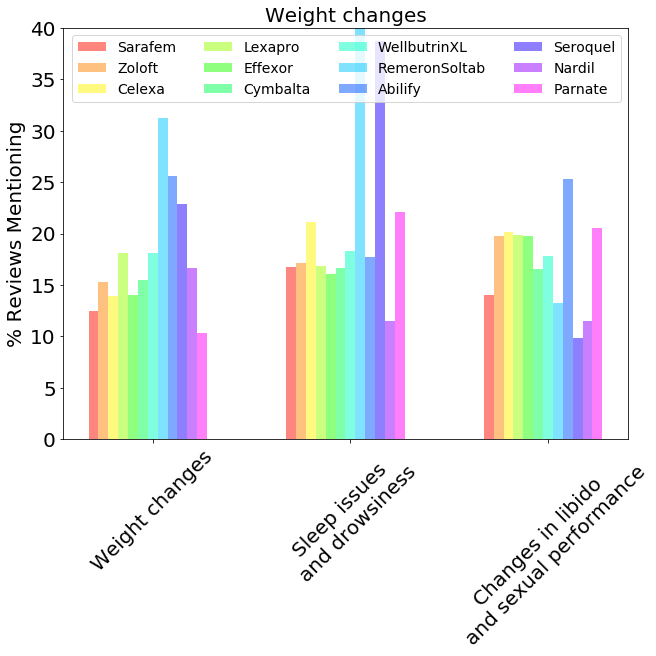

In [13]:
fig = plt.figure(figsize=(9,9), constrained_layout=True)
colors = lambda x: cm.gist_rainbow((x+0.5)/len(pureMedDF.columns))

# keepers = ['Weight changes', 'Memory and concentration issues', 'Sleep issues and drowsiness',
#            'Changes in libido and sexual performance', 'Changes in energy']#list(clustering.index)
keepers = ['Weight changes', 'Sleep issues and drowsiness',
           'Changes in libido and sexual performance']#list(clustering.index)


for i,key in enumerate(pureMedDF):
    norm = pureMedDF[key].eq(1).sum()
    p1 = plt.bar(np.arange(len(keepers))+i*0.05, 
                 (data[pureMedDF[key].eq(1)][keepers]).sum(axis=0)/norm*100, 
                 0.05, label=key, align='center', color=colors(i), alpha=0.5)
#         oldkey = str(key)

#     else:
#         labelkey = str(key)
#         p2 = plt.bar(np.arange(len(keepers)), (data[pureMedDF[key].eq(1)][keepers]).sum(), 
#                      0.6, bottom=(data[pureMedDF[key].eq(1)][keepers]).sum(), label=labelkey)

# keepers = ['Weight changes', 'Memory and \nconcentration issues', 'Sleep issues \nand drowsiness',
#            'Changes in libido \nand sexual performance', 'Changes in energy']#list(clustering.index)
keepers = ['Weight changes', 'Sleep issues \nand drowsiness',
          'Changes in libido \nand sexual performance']#list(clustering.index)


xticks = []
for keep in keepers:
    if keep.find('dizz') == -1:
        xticks.append(keep)
    else: 
        xticks.append('lightheadedness')
        
plt.xticks(np.arange(len(keepers))+len(pureMedDF.columns)//2*0.05, 
           xticks, rotation=45, fontsize=20)
#plt.xlabel('Medication', fontsize=20)
plt.title('Weight changes', fontsize=20)
plt.legend(ncol=len(pureMedDF.columns)//3, fontsize=14)

plt.yticks(fontsize=20)
plt.ylabel('% Reviews Mentioning', fontsize=20)
plt.ylim(0,40)

fig.savefig('fake_result.png',transparent=True)

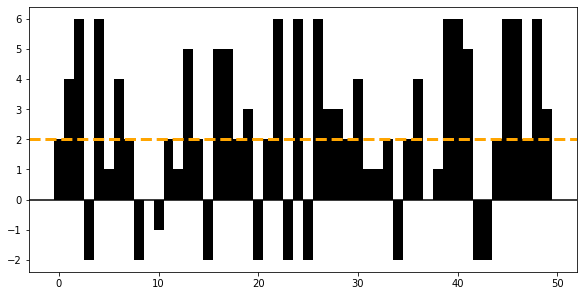

In [10]:
plt.figure(figsize=(8,4), constrained_layout=True)
np.random.seed=42
y = np.random.randint(-2,7,size=50)
plt.bar(np.arange(50), y, width=1, color='k')
plt.axhline(0,linestyle='-', color='k')
plt.axhline(np.median(y), linestyle='--', lw=3, color='orange')
plt.savefig('ArbitraryCV.png')